In [1]:
import pandas as pd;
import numpy as np;


In [2]:
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline

In [6]:
df  = pd.read_csv('Classified Data',index_col=0)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
from sklearn.preprocessing import StandardScaler;


In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [22]:
len(df.columns)
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)

In [21]:
df.columns[0:10]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [23]:
pd_sclaed_feature = pd.DataFrame(data=scaled_features,columns = df.columns[0:10],index=df.index)

In [25]:
from sklearn.model_selection import train_test_split;

In [28]:
X=pd_sclaed_feature;
y=df['TARGET CLASS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [29]:
X_train.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
290,-0.865812,-0.426085,-0.098704,-0.358143,-0.090834,-1.445613,0.943619,-0.711715,-1.416361,1.335201
167,-0.289633,0.427599,-0.324566,-0.291304,-1.047206,-0.847424,0.309935,-2.102427,-1.071680,0.809926
486,-1.628411,0.840546,1.164633,-0.985219,0.346949,-0.064661,1.008390,-0.184080,0.865138,-0.630975
683,-0.576123,-0.157888,0.102529,1.176857,-2.475351,-0.599677,-0.249565,0.262795,0.598726,1.376306
876,0.059207,1.006760,1.932615,2.225987,-0.570004,0.634646,2.427879,1.136821,0.104758,-0.175808


In [30]:
from sklearn.neighbors import KNeighborsClassifier;

In [32]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [33]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [35]:
pred =KNN.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix;

In [38]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.95      0.93       159\n           1       0.94      0.89      0.92       141\n\n    accuracy                           0.92       300\n   macro avg       0.92      0.92      0.92       300\nweighted avg       0.92      0.92      0.92       300\n'

In [39]:
confusion_matrix(y_test,pred)

array([[151,   8],
       [ 15, 126]])

In [40]:
#which k to chose for the best

In [42]:
error_rate = []

for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

In [43]:
error_rate


[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

In [52]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

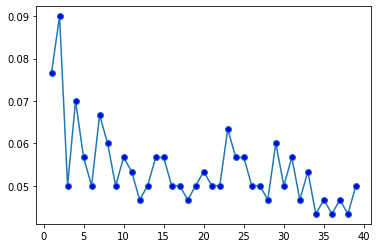

In [53]:
plt.plot(range(1,40),error_rate,marker='o',markerfacecolor='blue',)

In [54]:
k= 17

In [56]:
KNN =KNeighborsClassifier(n_neighbors=17)
KNN.fit(X_train,y_train)
pred_17=KNN.predict(X_test)
classification_report(y_test,pred_17)

'              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95       159\n           1       0.96      0.94      0.95       141\n\n    accuracy                           0.95       300\n   macro avg       0.95      0.95      0.95       300\nweighted avg       0.95      0.95      0.95       300\n'